<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
    - An input layer (or visible layer) receives an input from a dataset.
### Hidden Layer:
    - Hidden layers are layers between the input and output layers.  They can only be accessed through the input layer thus, we do not directly interact with them.
### Output Layer:
    - Output layers are the final layers of a neural network and is typically a vector of predictions.
### Neuron:
    - A Neuron is the basic unit of a neural network accepting any number of inputs and weights
![Neuron](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/47_blog_image_2.png)
### Weight:
    - A weight is a modifier representing the strength of a connection between two layers.  Weights close to 0 mean changing the input will not afftect the output.  Negative weights mean an increasing input will decrease the output.
### Activation Function:
    - Activation functions introduce non-linearity into a neural network
    - They are sort of like trigger hairs of a nematocyst or a Venus Fly Trap in that it will determine whether the neuron fires.
![Activation Functions](https://hackernoon.com/hn-images/1*p_hyqAtyI8pbt2kEl6siOQ.png)
### Node Map:
    - Node maps are visual diagrams of the layout of a neural network.
![Node Map](https://miro.medium.com/max/2636/1*3fA77_mLNiJTSgZFhYnU0Q.png)
### Perceptron:
    - A perceptron is the simplest Neural Network consisting of a single node or neuron with nothing else taking any number of inputs and spitting out an output.
![Perceptron](https://www.allaboutcircuits.com/uploads/articles/how-to-train-a-basic-perceptron-neural-network_rk_aac_image1.jpg)


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

An input is received and multiplied by a weight.  A bias of 1 is introduced as another input to offset a case where all other inputs would be None (0).  The neuron will continue to fire if it fits a given activation function such as a Sigmoid function (between 0 and 1).  All of these steps then lead to an output.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [36]:
import pandas as pd
import numpy as np
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [38]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)

Form of ' y = sigmoid(sum(w1x1 + w2x2) + b) '

In [39]:
##### Your Code Here #####
# Start by defining activation functions (sigmoids)
class Sig():
    def __init__(self, x):
        self.x = x
        
    def sigmoid(self):
        return 1 / (1 + np.exp(-self.x))
    
    def sigmoid_derivative(self):
        sx = Sig(self.x).sigmoid()
        return sx * (1 - sx)

In [71]:
# Get the inputs
l1 = df['x1'].to_list()
l2 = df['x2'].to_list()
inputs = np.array([l1,l2])
inputs

array([[0, 1, 0, 1],
       [0, 0, 1, 1]])

In [72]:
# Outputs
outputs = np.array([df['y'].to_list()])
outputs

array([[1, 1, 1, 0]])

In [75]:
# Random weights for each input
weights = 2 * np.random.random((4,1)) - 1
weights

array([[ 0.49778348],
       [-0.48271525],
       [ 0.94195234],
       [ 0.79151575]])

In [76]:
# Get weighted sum of inputs and weights
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[0.30880051],
       [1.7334681 ]])

In [77]:
# Sigmoid activation
activated_output = Sig(weighted_sum).sigmoid()
activated_output

array([[0.57659245],
       [0.84985549]])

In [78]:
# Calculate the error
error = outputs - activated_output
error

array([[ 0.42340755,  0.42340755,  0.42340755, -0.57659245],
       [ 0.15014451,  0.15014451,  0.15014451, -0.84985549]])

In [79]:
# Gradient descent/backpropagation
adjustments = error * Sig(weighted_sum).sigmoid_derivative()
adjustments

array([[ 0.10336801,  0.10336801,  0.10336801, -0.14076559],
       [ 0.01915861,  0.01915861,  0.01915861, -0.10844253]])

In [80]:
weights = weights + np.dot(inputs.T, adjustments)
weights

array([[ 0.49778348,  0.49778348,  0.49778348,  0.49778348],
       [-0.37934724, -0.37934724, -0.37934724, -0.62348083],
       [ 0.96111095,  0.96111095,  0.96111095,  0.83350982],
       [ 0.91404237,  0.91404237,  0.91404237,  0.54230764]])

In [81]:
# Iterate many times to reduce error
for i in range(10000):
    # Get weighted sum of inputs and weights
    weighted_sum = np.dot(inputs, weights)

    # Sigmoid activation
    activated_output = Sig(weighted_sum).sigmoid()

    # Calculate the error
    error = outputs - activated_output

    # Gradient descent/backpropagation
    adjustments = error * Sig(weighted_sum).sigmoid_derivative()

    weights = weights + np.dot(inputs.T, adjustments)

print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[ 0.49778348  0.49778348  0.49778348  0.49778348]
 [ 1.6613736   1.6613736   1.6613736  -1.98503055]
 [ 1.78247776  1.78247776  1.78247776 -1.89876404]
 [ 3.77613002  3.77613002  3.77613002 -3.55151594]]
Output after training
[[0.99566829 0.99566829 0.99566829 0.00392484]
 [0.99616048 0.99616048 0.99616048 0.00427695]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [83]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60000,0.62700,50,1
1,1,85,66,29,0,26.60000,0.35100,31,0
2,8,183,64,0,0,23.30000,0.67200,32,1
3,1,89,66,23,94,28.10000,0.16700,21,0
4,0,137,40,35,168,43.10000,2.28800,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

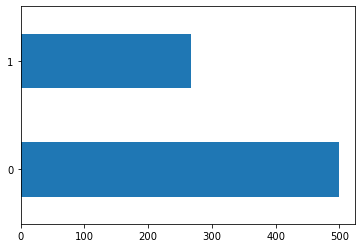

In [87]:
# Visualize class imbalance
diabetes['Outcome'].value_counts().plot(kind='barh')

In [101]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

# Removing columns from the data
X = diabetes.drop('Outcome', axis=1)

# Get our target vector
y = diabetes['Outcome']

# Scale the data
mmscaler = MinMaxScaler()

# Fit the data
X_scaled = pd.DataFrame(mmscaler.fit_transform(X), columns=feats)
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.35294,0.74372,0.59016,0.35354,0.00000,0.50075,0.23442,0.48333
1,0.05882,0.42714,0.54098,0.29293,0.00000,0.39642,0.11657,0.16667
2,0.47059,0.91960,0.52459,0.00000,0.00000,0.34724,0.25363,0.18333
3,0.05882,0.44724,0.54098,0.23232,0.11111,0.41878,0.03800,0.00000
4,0.00000,0.68844,0.32787,0.35354,0.19858,0.64232,0.94364,0.20000
...,...,...,...,...,...,...,...,...
763,0.58824,0.50754,0.62295,0.48485,0.21277,0.49031,0.03971,0.70000
764,0.11765,0.61307,0.57377,0.27273,0.00000,0.54844,0.11187,0.10000
765,0.29412,0.60804,0.59016,0.23232,0.13239,0.39046,0.07131,0.15000
766,0.05882,0.63317,0.49180,0.00000,0.00000,0.44858,0.11571,0.43333


In [182]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, niter = 10):
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = self.__sigmoid(x)
        return sx * (1 - sx)

    def fit(self, X, y):
        """
        Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        self.weights = 2 * np.random.random((X.shape[1], 1)) - 1
        
        self.inputs = X.values.tolist()
        
        self.outputs = y.values.tolist()

        for i in range(self.niter):
                     
            # Weighted sum of inputs / weights
            self.weighted_sum = np.dot(self.inputs, self.weights)

            # Activate!
            self.activated_outputs = self.__sigmoid(self.weighted_sum)

            # Cac error
            self.error = self.outputs - self.activated_outputs
            self.adjustments = self.error * self.__sigmoid_derivative(self.weighted_sum)
            
            # Update the Weights
            self.weights = self.weights + np.dot(np.array(self.inputs).T, self.adjustments)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.weights)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) == 0.0, 1, -1)[0]

In [183]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

pn = Perceptron(10)
pn.fit(X_scaled, y)

y_pred = pn.predict(X_scaled)

In [184]:
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [185]:
len(y)

768

In [186]:
accuracy_score(y, y_pred)

0.0

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?